We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)
   

# Essentials

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt

folder_dir='./194_5yearsData/'

history={}
for i in os.listdir(folder_dir):
    tkname=str(i)[:-4]
    df=pd.read_csv(folder_dir+i,index_col=[0],parse_dates=['Time'])
    for i in range(len(df)):
        df.Time.iloc[i]=df.Time.iloc[i].date()
    df=df.set_index('Time')
    history[tkname]=df

# 1. What was the change in price of the stock overtime?


In [2]:
history['ADANIENT'].describe()

,Open,High,Low,Close,Volume
count,1235.000000,1235.00000,1235.000000,1235.000000,1.235000e+03
mean,796.506802,812.22170,781.719352,797.960891,5.948020e+06
std,928.644247,944.47064,913.494650,930.263539,6.568057e+06
min,104.600000,107.95000,100.850000,105.050000,0.000000e+00
25%,149.300000,153.30000,146.200000,148.950000,2.515666e+06
50%,211.000000,215.75000,207.500000,211.850000,4.143731e+06
75%,1478.500000,1517.50000,1453.900000,1482.950000,6.771354e+06
max,4040.000000,4048.95000,3975.150000,4008.850000,7.481770e+07


In [3]:
# General info
history['ADANIENT'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1235 entries, 2017-11-16 to 2022-11-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1235 non-null   float64
 1   High    1235 non-null   float64
 2   Low     1235 non-null   float64
 3   Close   1235 non-null   float64
 4   Volume  1235 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 57.9+ KB


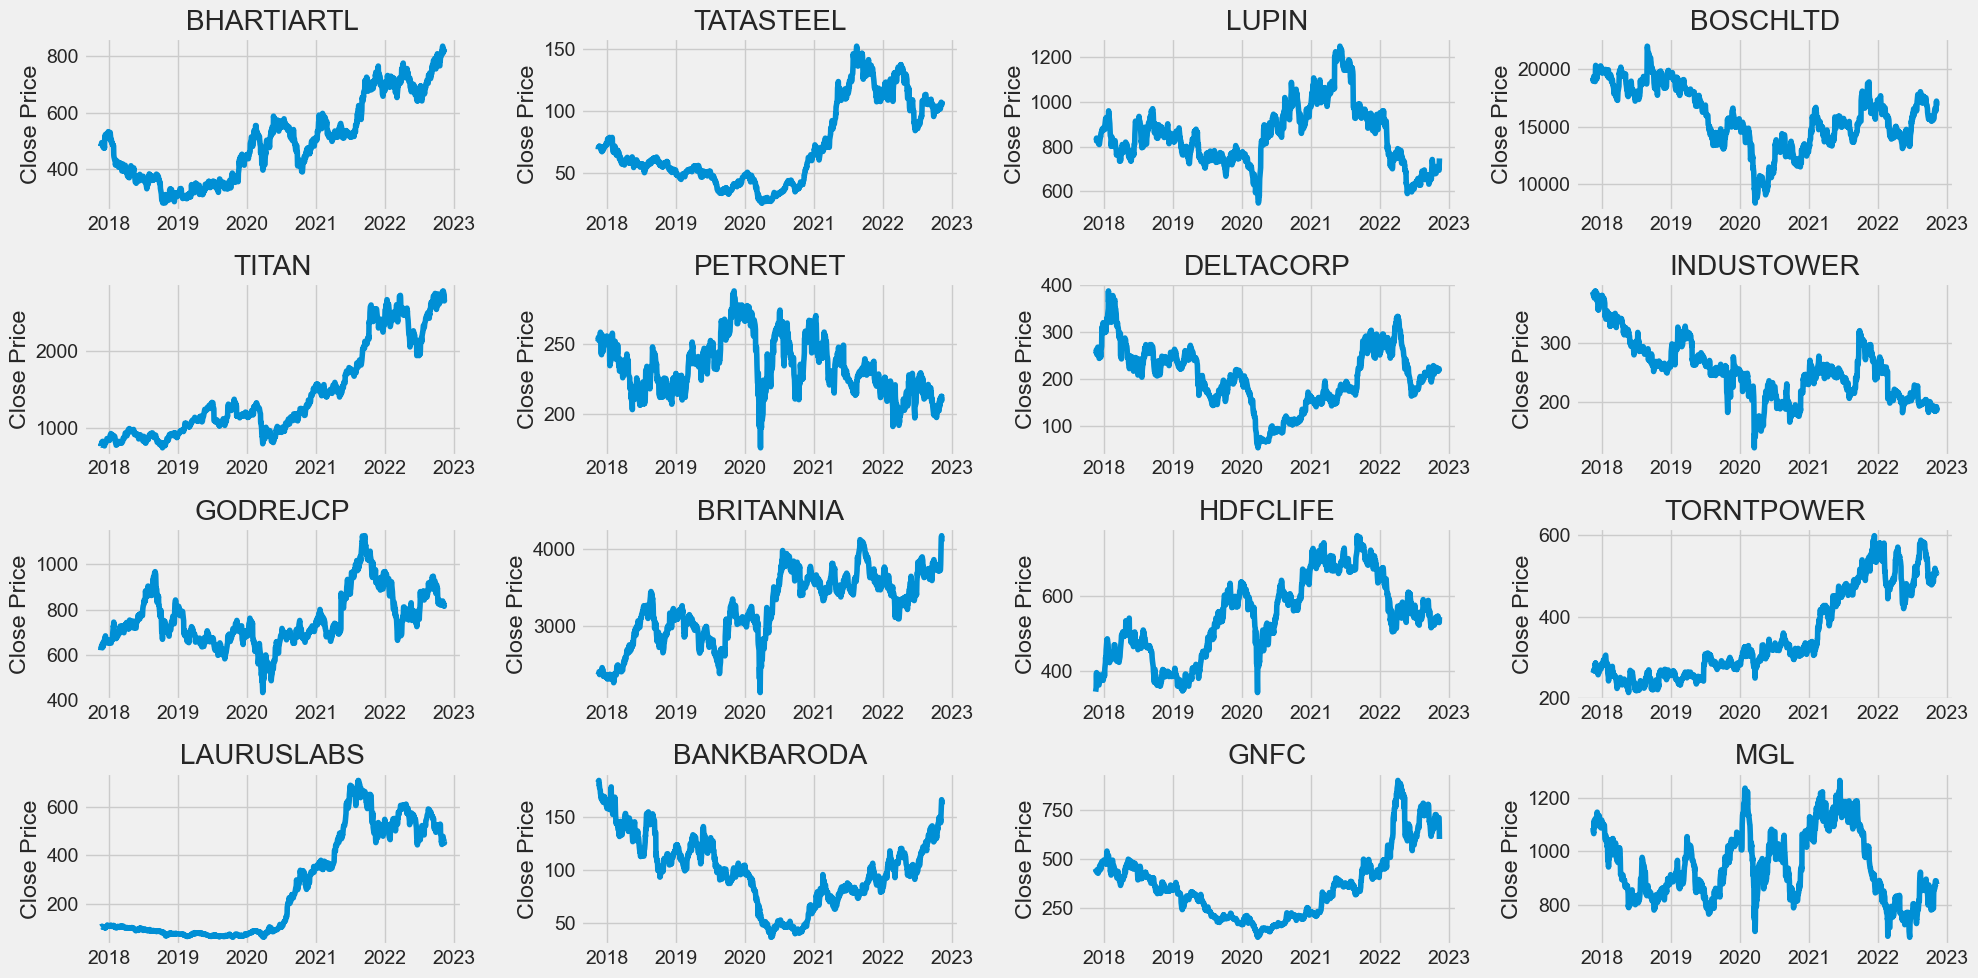

In [4]:
# Let's see a historical view of the closing price

plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=1.25, bottom=1.2,hspace=0.3)
c=1
for i in history.keys():
    plt.subplot(4,4, c)
    history[i].Close.plot()
    plt.ylabel('Close Price')
    plt.xlabel(None)
    plt.title(f"{i}")
    if c==16:
        break
    
    c+=1
    
plt.tight_layout()

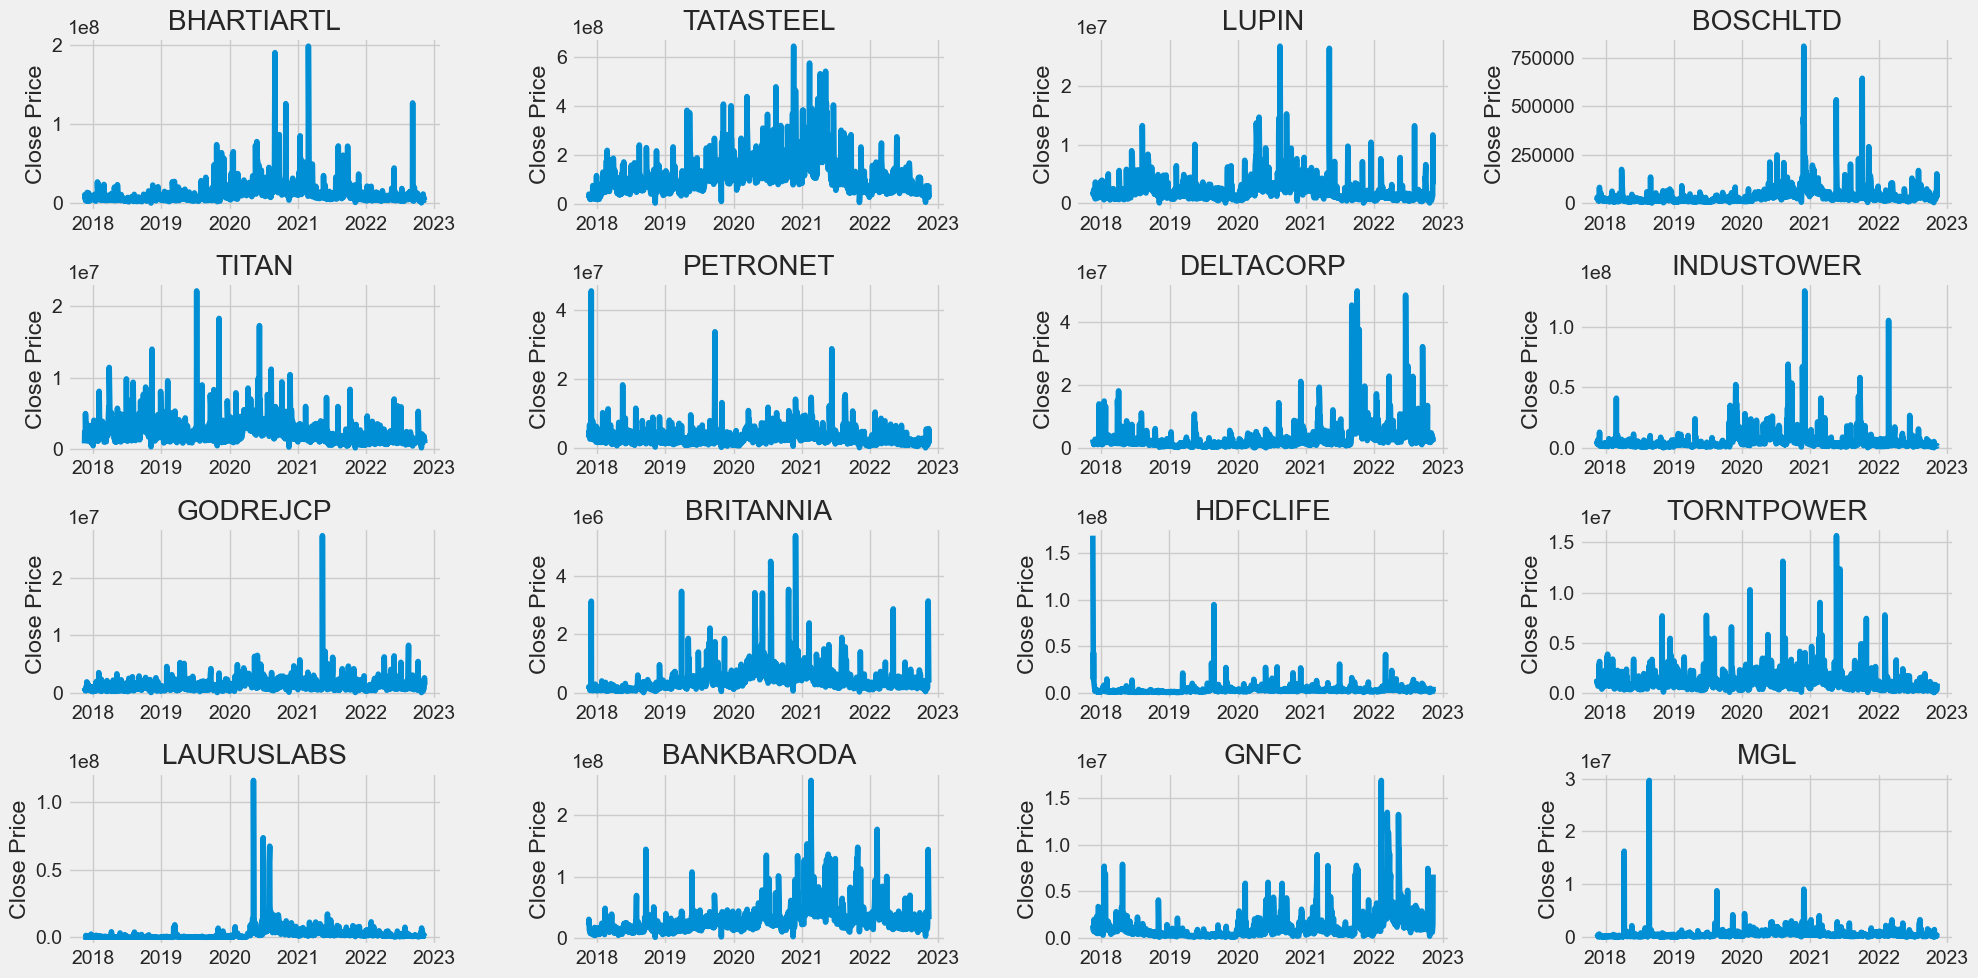

In [5]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=1.25, bottom=1.2,hspace=0.3)
c=1
for i in history.keys():
    plt.subplot(4,4, c)
    history[i].Volume.plot()
    plt.ylabel('Close Price')
    plt.xlabel(None)
    plt.title(f"{i}")
    if c==16:
        break
    
    c+=1
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

In [6]:
ma_day = [50,100,200]

for i in history.keys():
    for ma in ma_day:
        column_name = f"{ma}MA"
        history[i][column_name]=history[i].Close.rolling(ma).mean()

In [7]:
history['ACC'].columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', '50MA', '100MA', '200MA'], dtype='object')

Now let's go ahead and plot all the additional Moving Averages

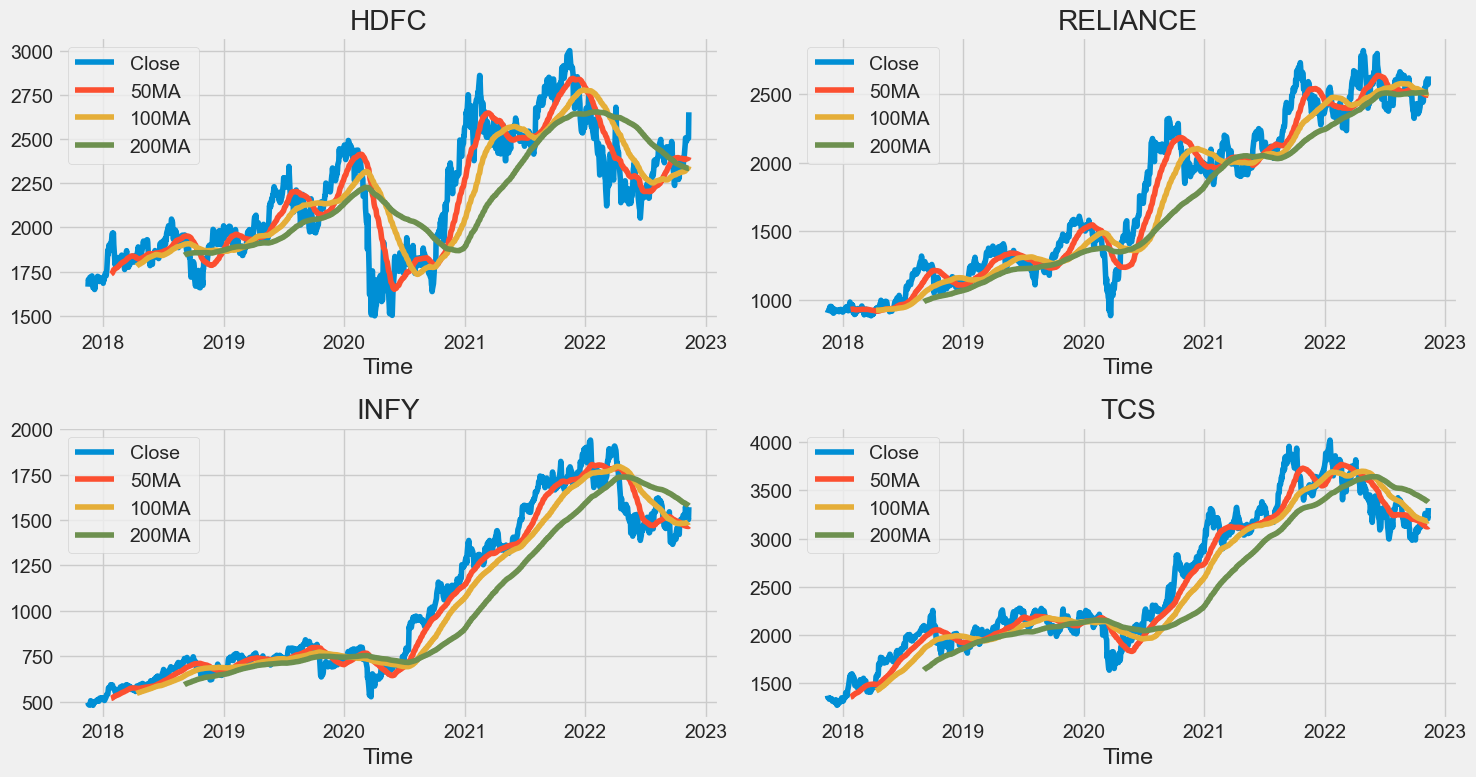

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

history['HDFC'][['Close','50MA','100MA','200MA']].plot(ax=axes[0,0])
axes[0,0].set_title('HDFC')

history['RELIANCE'][['Close','50MA','100MA','200MA']].plot(ax=axes[0,1])
axes[0,1].set_title('RELIANCE')

history['INFY'][['Close','50MA','100MA','200MA']].plot(ax=axes[1,0])
axes[1,0].set_title('INFY')

history['TCS'][['Close','50MA','100MA','200MA']].plot(ax=axes[1,1])
axes[1,1].set_title('TCS')
fig.tight_layout()

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

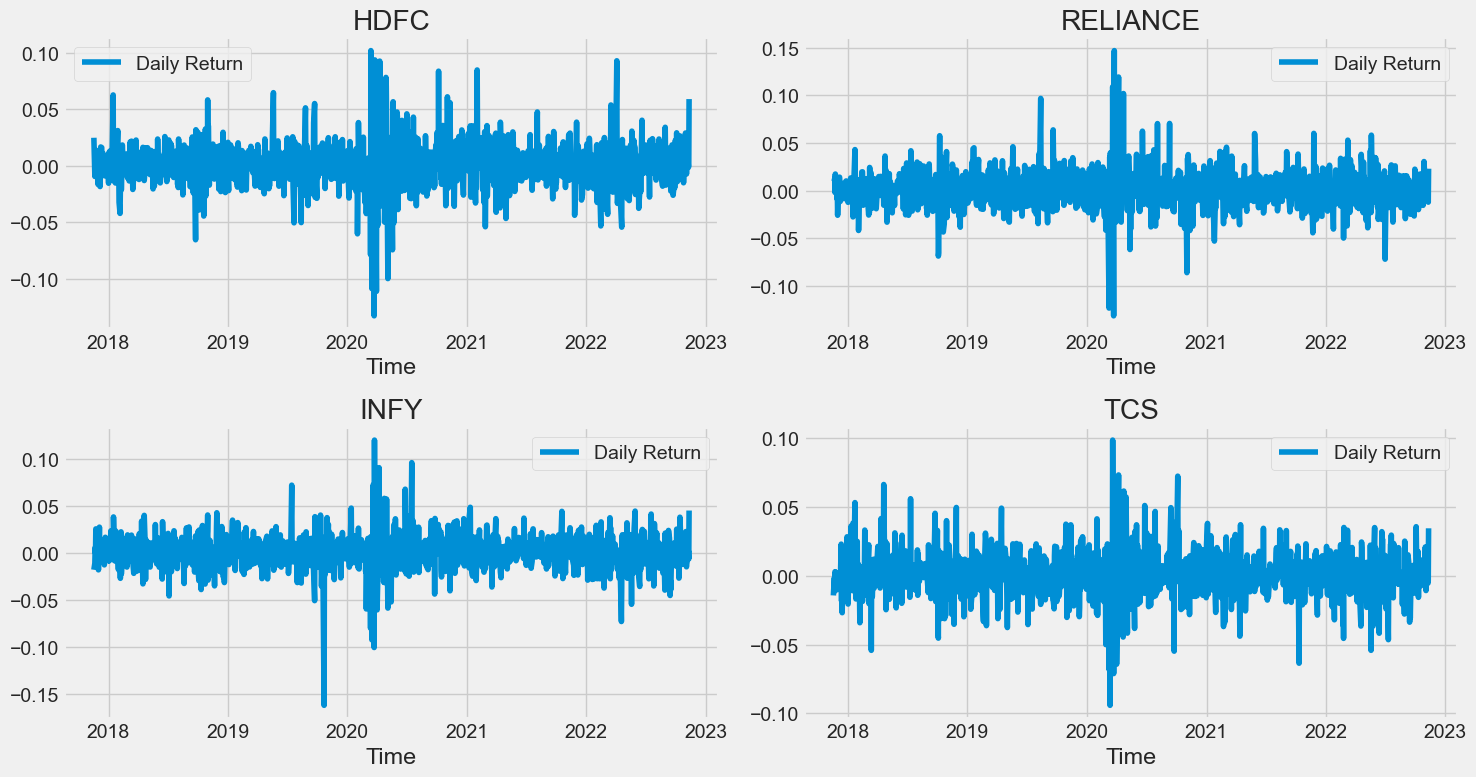

In [9]:
# We'll use pct_change to find the percent change for each day
for i in history.keys():
    history[i]['Daily Return'] = history[i]['Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

history['HDFC'][['Daily Return']].plot(ax=axes[0,0])
axes[0,0].set_title('HDFC')

history['RELIANCE'][['Daily Return']].plot(ax=axes[0,1])
axes[0,1].set_title('RELIANCE')

history['INFY'][['Daily Return']].plot(ax=axes[1,0])
axes[1,0].set_title('INFY')

history['TCS'][['Daily Return']].plot(ax=axes[1,1])
axes[1,1].set_title('TCS')
fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

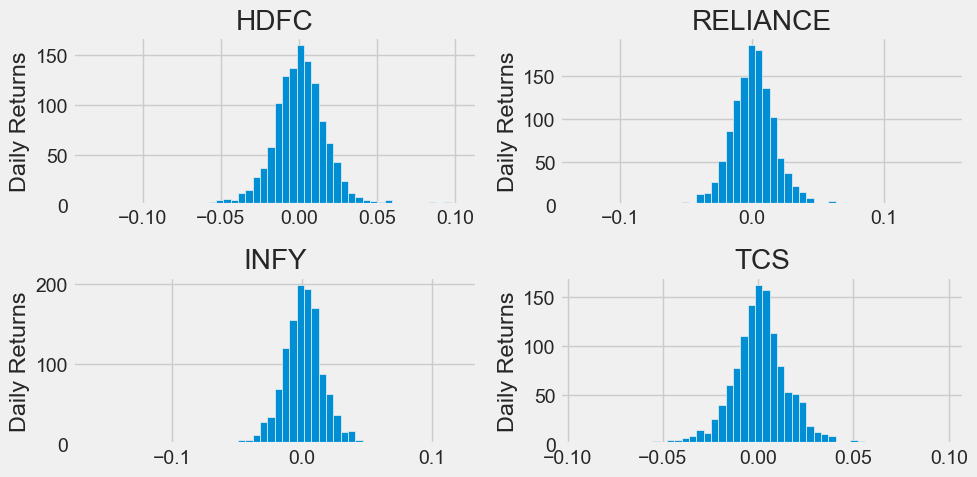

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(2,2,1)
history['HDFC']['Daily Return'].hist(bins=50)
plt.ylabel('Daily Returns')
plt.title('HDFC')
plt.subplot(2,2,2)
history['RELIANCE']['Daily Return'].hist(bins=50)
plt.ylabel('Daily Returns')
plt.title('RELIANCE')
plt.subplot(2,2,3)
history['INFY']['Daily Return'].hist(bins=50)
plt.ylabel('Daily Returns')
plt.title('INFY')
plt.subplot(2,2,4)
history['TCS']['Daily Return'].hist(bins=50)
plt.ylabel('Daily Returns')
plt.title('TCS')
plt.tight_layout()


# 4. What was the correlation between different stocks closing prices?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [11]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df=pd.DataFrame()
for i in history.keys():
    closing_df[i]=history[i]['Close']
    

# Let's take a quick look
closing_df.head() 

,BHARTIARTL,TATASTEEL,LUPIN,BOSCHLTD,TITAN,PETRONET,DELTACORP,INDUSTOWER,GODREJCP,BRITANNIA,...,SIEMENS,BAJAJFINSV,BAJFINANCE,BSOFT,WHIRLPOOL,M&M,PERSISTENT,MUTHOOTFIN,MCDOWELL-N,IEX
Time,,,,,,,,,,,,,,,,,,,,,
2017-11-16,480.85,68.65,829.00,19258.45,768.30,252.15,259.70,384.65,620.90,2368.35,...,1169.45,498.45,1764.25,168.55,1323.00,706.98,642.90,458.10,623.47,50.30
2017-11-17,484.40,70.10,829.55,18965.90,786.30,254.90,257.85,380.15,629.40,2375.02,...,1192.80,512.95,1787.35,166.35,1345.10,708.38,646.00,456.55,637.11,50.45
2017-11-20,483.55,70.20,826.15,19376.50,783.95,253.05,262.20,383.70,638.37,2381.60,...,1184.25,517.35,1805.25,167.55,1400.25,704.00,649.50,449.70,648.96,50.15
2017-11-21,494.00,71.15,837.45,19237.50,815.45,252.50,263.20,383.55,633.37,2408.45,...,1197.55,520.60,1809.75,172.50,1448.30,708.00,653.05,452.40,640.35,50.50
2017-11-22,489.90,71.10,827.40,19008.80,813.15,252.80,262.00,376.45,637.00,2387.57,...,1192.10,517.65,1773.95,171.85,1458.45,714.75,654.45,460.90,659.92,51.95


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [12]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,BHARTIARTL,TATASTEEL,LUPIN,BOSCHLTD,TITAN,PETRONET,DELTACORP,INDUSTOWER,GODREJCP,BRITANNIA,...,SIEMENS,BAJAJFINSV,BAJFINANCE,BSOFT,WHIRLPOOL,M&M,PERSISTENT,MUTHOOTFIN,MCDOWELL-N,IEX
Time,,,,,,,,,,,,,,,,,,,,,
2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-17,0.007383,0.021122,0.000663,-0.015191,0.023428,0.010906,-0.007124,-0.011699,0.013690,0.002816,...,0.019967,0.029090,0.013093,-0.013053,0.016704,0.001980,0.004822,-0.003384,0.021878,0.002982
2017-11-20,-0.001755,0.001427,-0.004099,0.021649,-0.002989,-0.007258,0.016870,0.009338,0.014252,0.002771,...,-0.007168,0.008578,0.010015,0.007214,0.041001,-0.006183,0.005418,-0.015004,0.018600,-0.005946
2017-11-21,0.021611,0.013533,0.013678,-0.007174,0.040181,-0.002173,0.003814,-0.000391,-0.007832,0.011274,...,0.011231,0.006282,0.002493,0.029543,0.034315,0.005682,0.005466,0.006004,-0.013267,0.006979
2017-11-22,-0.008300,-0.000703,-0.012001,-0.011888,-0.002821,0.001188,-0.004559,-0.018511,0.005731,-0.008669,...,-0.004551,-0.005667,-0.019782,-0.003768,0.007008,0.009534,0.002144,0.018789,0.030561,0.028713


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

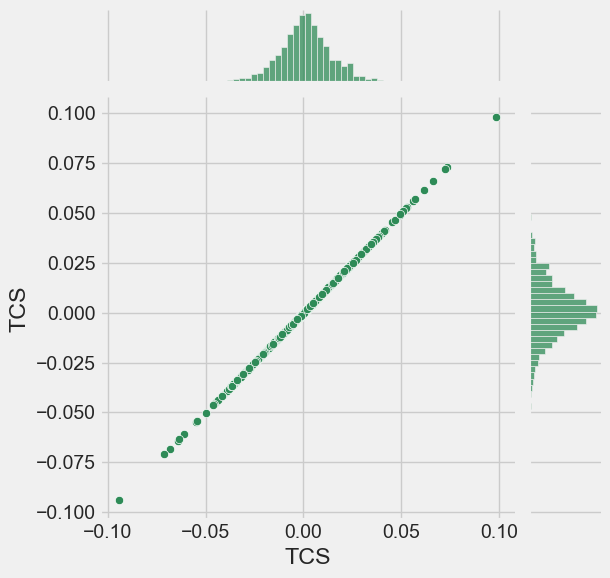

In [13]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='TCS', y='TCS', data=tech_rets, kind='scatter', color='seagreen')

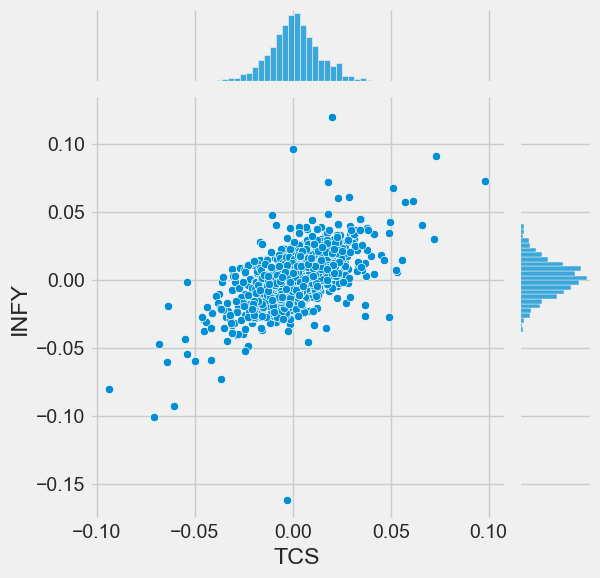

In [14]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='TCS', y='INFY', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

In [15]:
half=tech_rets.loc[:,['HDFC','TCS','INFY','RELIANCE']]
half

,HDFC,TCS,INFY,RELIANCE
Time,,,,
2017-11-16,NaN,NaN,NaN,NaN
2017-11-17,0.024694,-0.014330,-0.017645,0.008906
2017-11-20,-0.009557,-0.001418,-0.010711,0.009815
2017-11-21,0.003138,-0.011282,0.005934,0.012706
2017-11-22,0.013957,0.002881,0.000041,-0.001930
...,...,...,...,...
2022-11-04,-0.001105,0.003321,-0.010942,0.014715
2022-11-07,0.008345,0.005066,-0.004326,0.005342
2022-11-09,-0.001555,-0.005458,0.002488,-0.000997


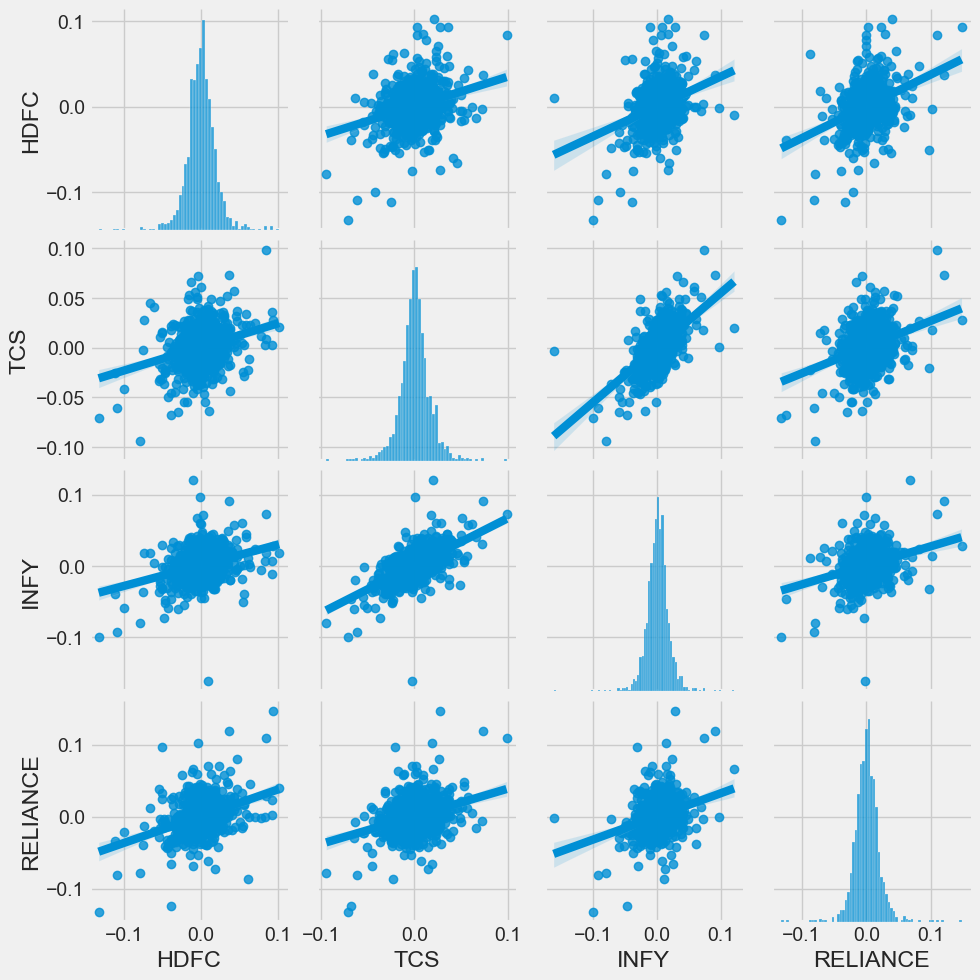

In [16]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(half, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

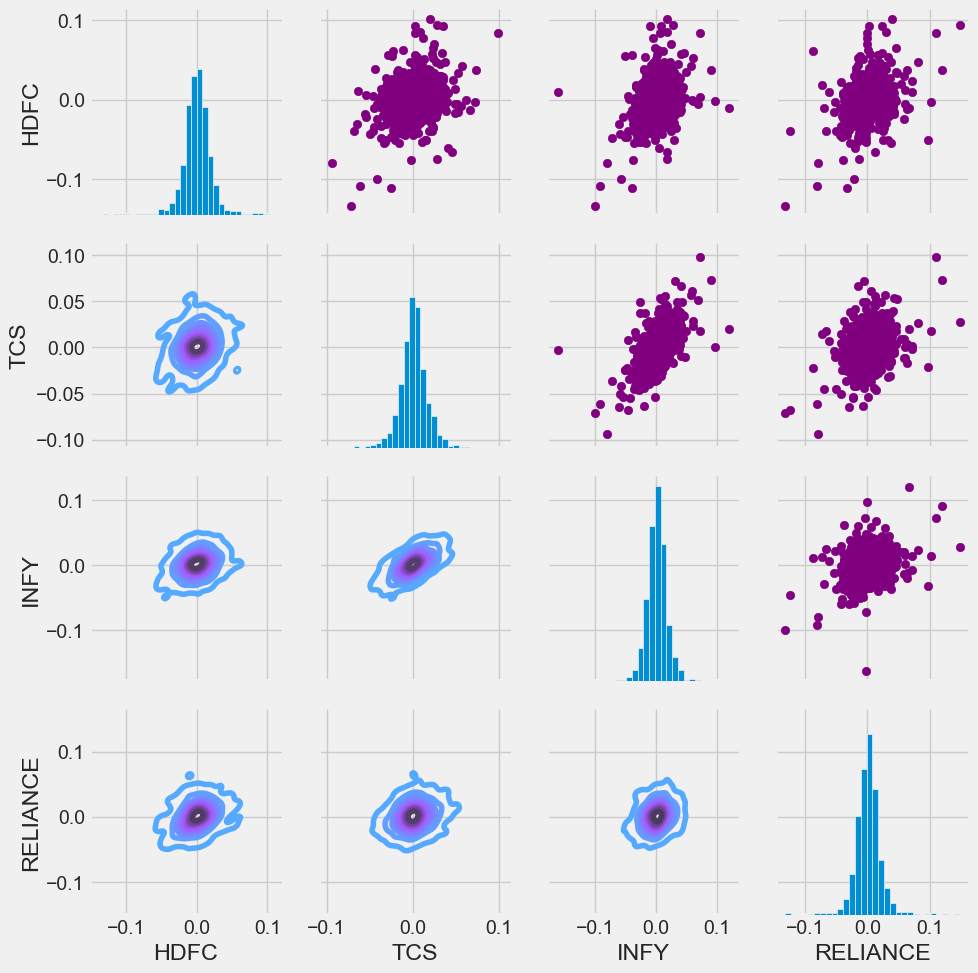

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(half.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

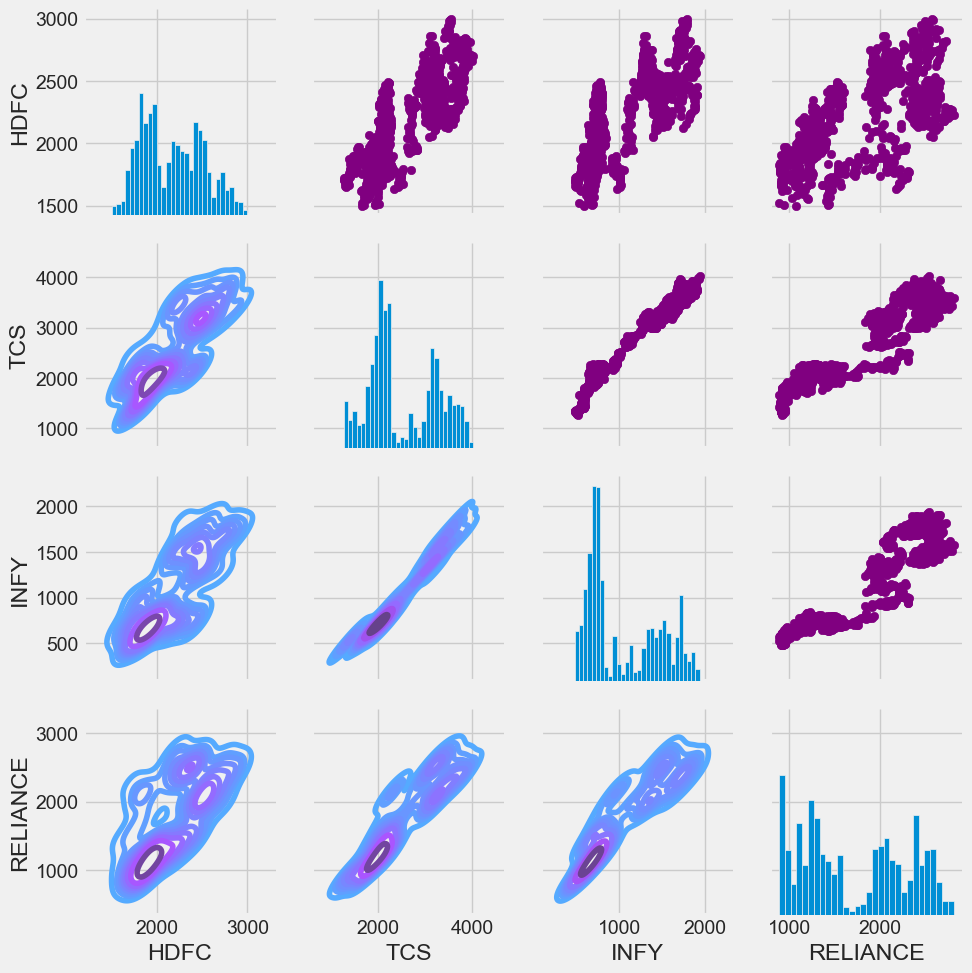

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
half_closing=closing_df.loc[:,['HDFC','TCS','INFY','RELIANCE']]

returns_fig = sns.PairGrid(half_closing)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

<AxesSubplot: >

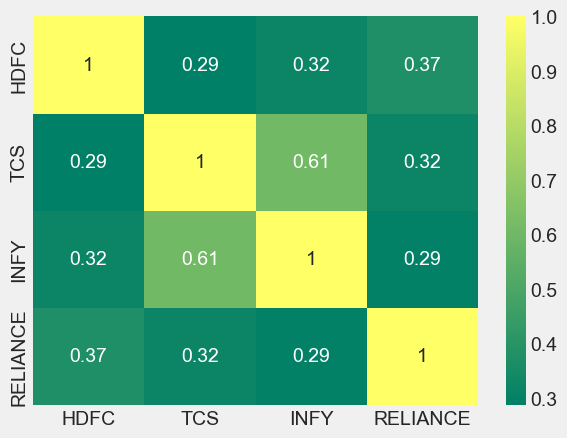

In [20]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(half.corr(), annot=True, cmap='summer')

<AxesSubplot: >

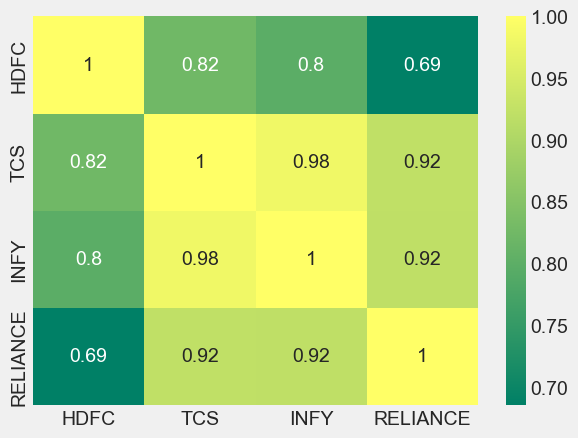

In [21]:
sns.heatmap(half_closing.corr(), annot=True, cmap='summer')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

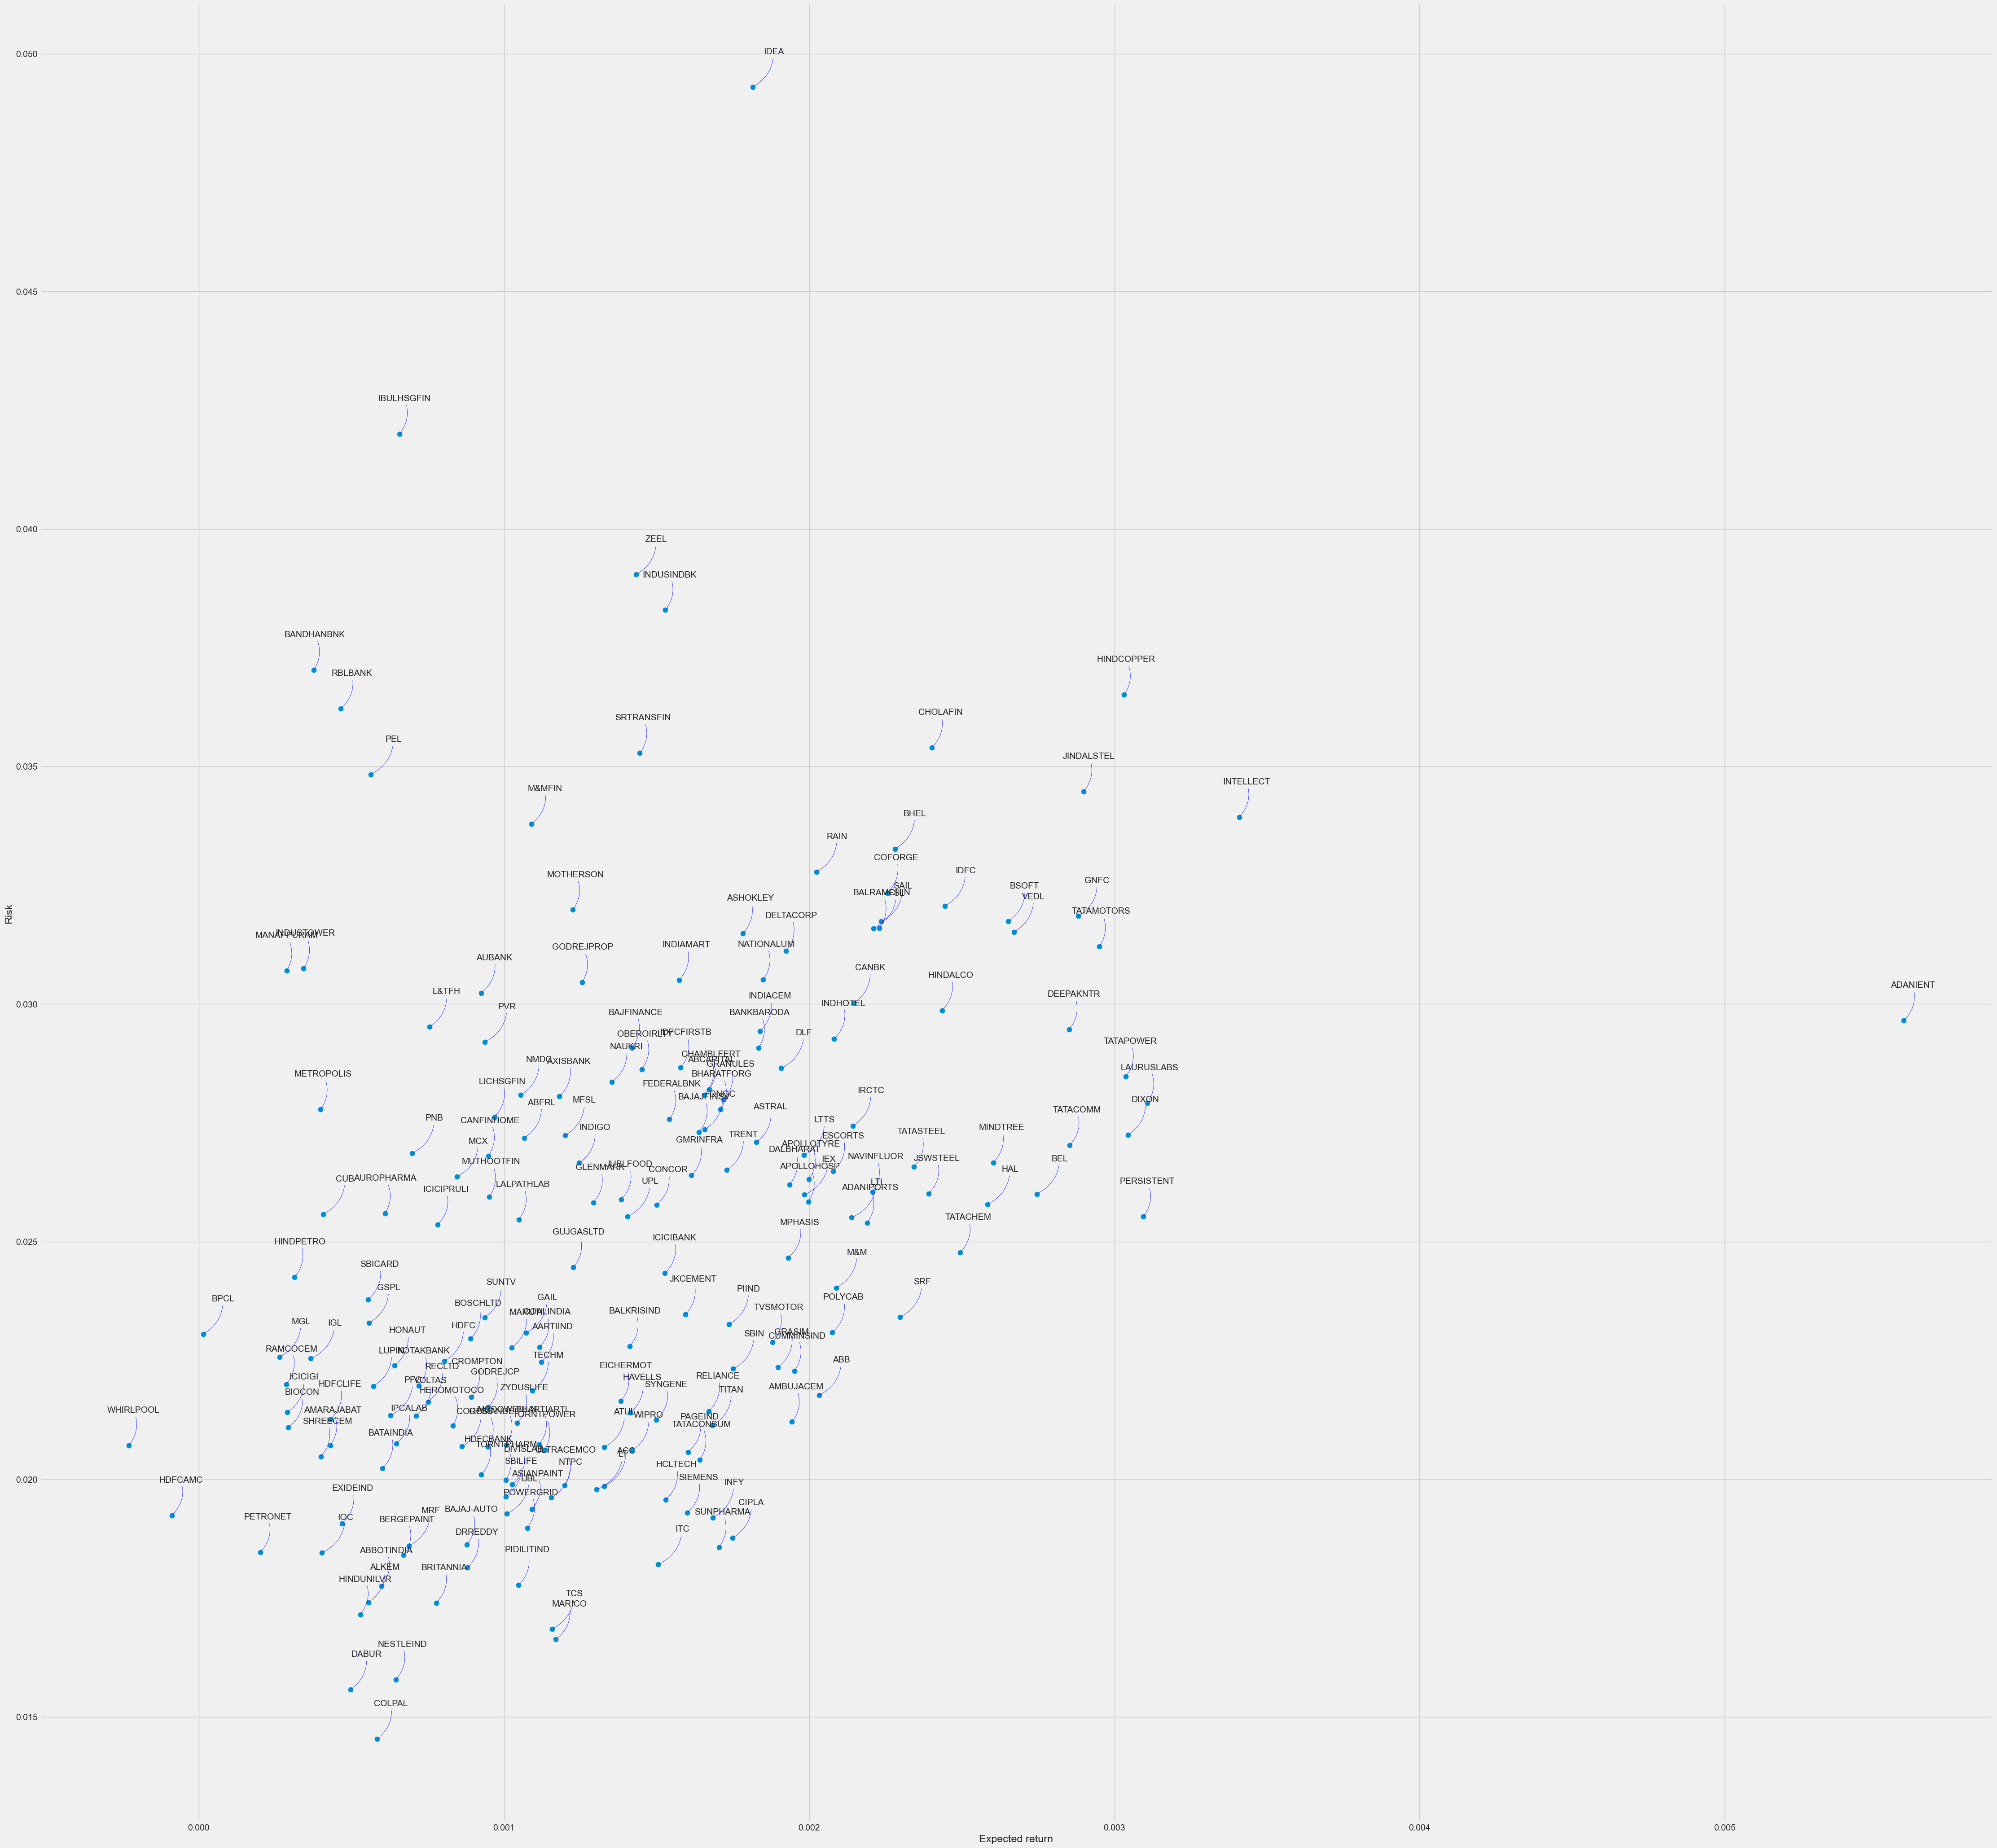

In [50]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(50, 50))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
plt.savefig('riskvsreturn.png')

# 6. Predicting the closing price stock price of RELIANCE :

In [31]:
df=history['RELIANCE']
df

,Open,High,Low,Close,Volume,50MA,100MA,200MA,Daily Return
Time,,,,,,,,,
2017-11-16,885.50,906.00,885.50,903.85,6931038,NaN,NaN,NaN,NaN
2017-11-17,918.95,924.90,908.50,911.90,5586242,NaN,NaN,NaN,0.008906
2017-11-20,906.20,924.35,905.00,920.85,4220192,NaN,NaN,NaN,0.009815
2017-11-21,926.80,939.65,925.50,932.55,5980763,NaN,NaN,NaN,0.012706
2017-11-22,937.45,938.65,923.45,930.75,5055490,NaN,NaN,NaN,-0.001930
...,...,...,...,...,...,...,...,...,...
2022-11-04,2553.90,2600.00,2551.10,2592.75,5803737,2495.292,2507.3355,2516.20500,0.014715
2022-11-07,2591.00,2610.30,2574.00,2606.60,5440967,2494.629,2506.7725,2516.54300,0.005342
2022-11-09,2610.30,2621.95,2590.05,2604.00,5193814,2494.068,2506.5315,2516.80175,-0.000997


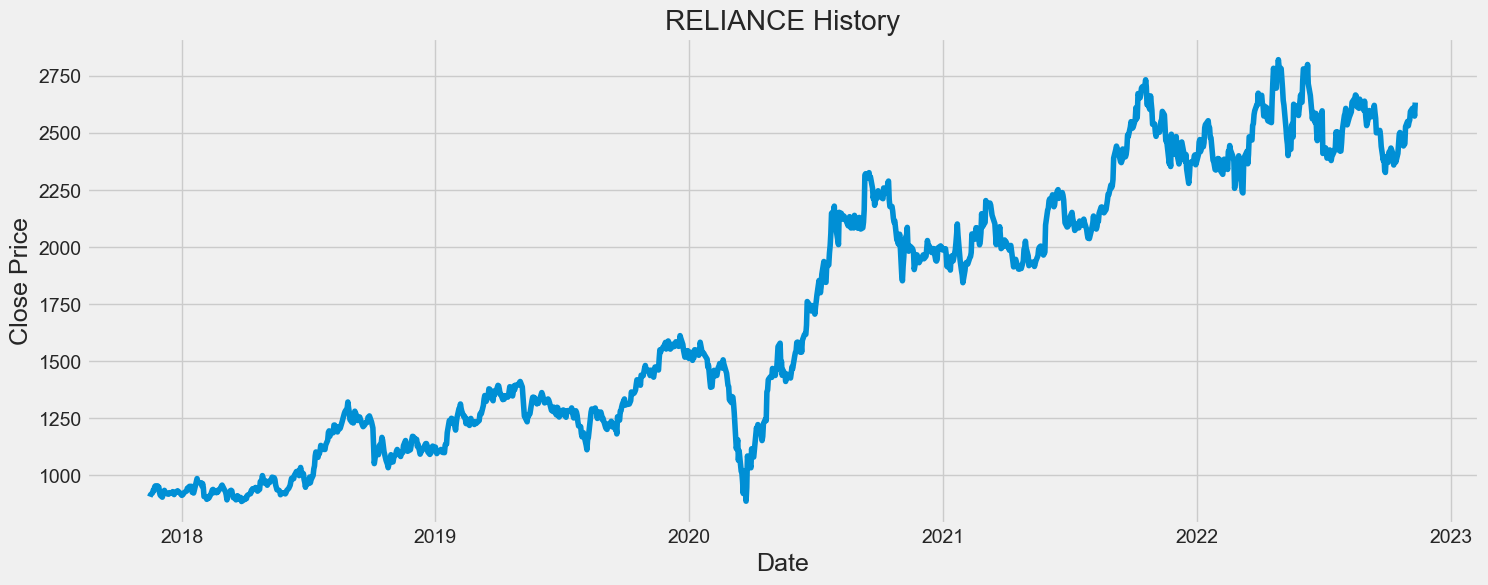

In [33]:
plt.figure(figsize=(16,6))
plt.title('RELIANCE History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [43]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))


In [35]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0109181 ],
       [0.01507369],
       [0.01969388],
       ...,
       [0.88857342],
       [0.87231242],
       [0.9029244 ]])

In [36]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0109181 , 0.01507369, 0.01969388, 0.02573368, 0.02480448,
       0.03319309, 0.0353096 , 0.03543866, 0.03130888, 0.03267687,
       0.02005524, 0.01414449, 0.0097566 , 0.01600289, 0.02268797,
       0.02521746, 0.01977131, 0.01726764, 0.01698371, 0.0164933 ,
       0.02002942, 0.01912604, 0.01977131, 0.02232661, 0.01830008,
       0.01561572, 0.01946158, 0.02431407, 0.02119092, 0.02142322,
       0.01979712, 0.01396381, 0.01468652, 0.01657074, 0.01940996,
       0.02093281, 0.02366879, 0.03006995, 0.03079266, 0.02841804,
       0.03422554, 0.03430297, 0.02077795, 0.02157809, 0.01910022,
       0.0250884 , 0.04584054, 0.05190615, 0.04318199, 0.04294969,
       0.04222698, 0.03494825, 0.04057507, 0.03156699, 0.01117621,
       0.01004052, 0.00485249, 0.0060398 , 0.01127946, 0.00782077])]
[0.016932090958366675]

[array([0.0109181 , 0.01507369, 0.01969388, 0.02573368, 0.02480448,
       0.03319309, 0.0353096 , 0.03543866, 0.03130888, 0.03267687,
       0.02005524, 0.01414449, 0.0

In [44]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5


2022-11-15 15:52:25.724722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-15 15:52:25.958219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-15 15:52:26.095824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-15 15:52:26.256022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-15 15:52:26.505518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1114/1114 [==============================] - 47s 40ms/step - loss: 0.0033
Epoch 2/5
1114/1114 [==============================] - 45s 40ms/step - loss: 0.0014
Epoch 3/5
1114/1114 [==============================] - 46s 41ms/step - loss: 0.0011
Epoch 4/5
1114/1114 [==============================] - 46s 42ms/step - loss: 8.8252e-04
Epoch 5/5
1114/1114 [==============================] - 45s 40ms/step - loss: 6.5624e-04


In [45]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2022-11-15 15:56:15.022099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-15 15:56:15.116358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2022-11-15 15:56:15.244501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 194ms/step


37.28428419219802

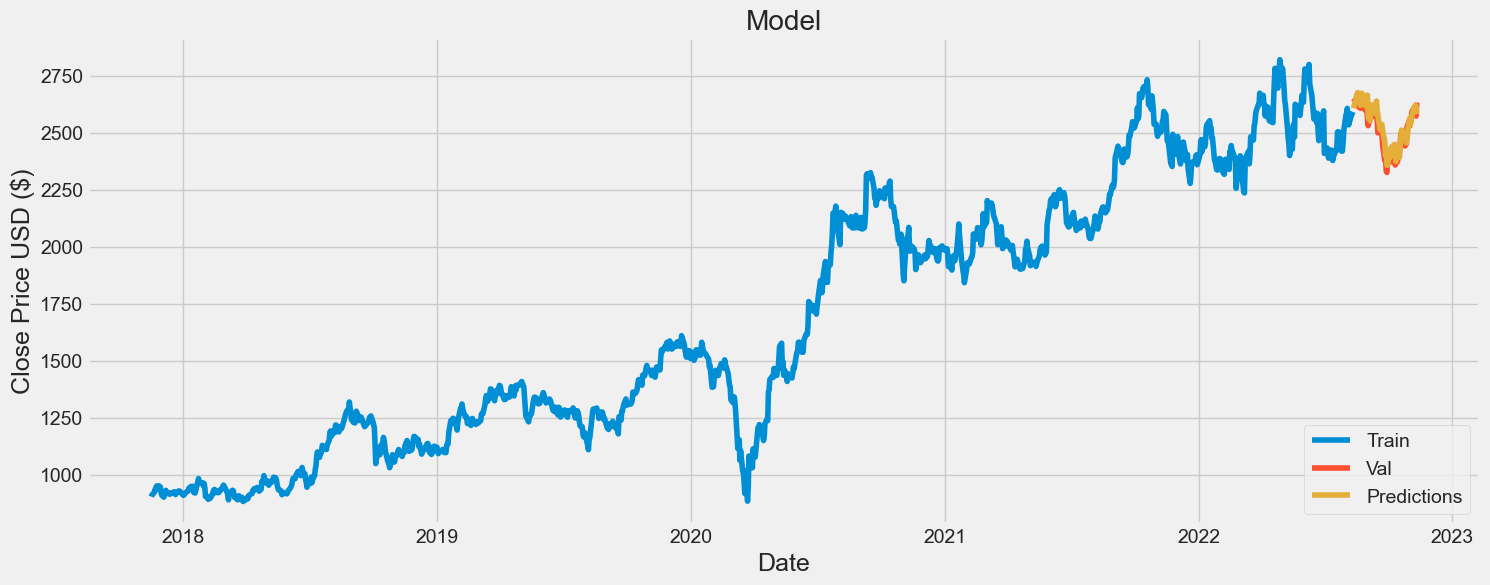

In [46]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [47]:
# Show the valid and predicted prices
valid

,Close,Predictions
Time,,
2022-08-12,2633.00,2607.130859
2022-08-16,2651.30,2652.183594
2022-08-17,2665.15,2663.054443
2022-08-18,2661.30,2675.406738
2022-08-19,2613.85,2669.525635
...,...,...
2022-11-04,2592.75,2569.724121
2022-11-07,2606.60,2610.816650
2022-11-09,2604.00,2618.541504
